# Lab 04: Filtering and Grouping Data

This lab is presented with some revisions from [Dennis Sun at Cal Poly](https://web.calpoly.edu/~dsun09/index.html) and his [Data301 Course](http://users.csc.calpoly.edu/~dsun09/data301/lectures.html)

### When you have filled out all the questions, submit via [Tulane Canvas](https://tulane.instructure.com/)

In [2]:
# first, mount your google drive, change to the course folder, pull latest changes, and change to the lab folder.
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My Drive/cmps3160
!git pull
%cd _labs/Lab04

Mounted at /content/drive
/content/drive/My Drive/cmps3160
Already up to date.
/content/drive/My Drive/cmps3160/_labs/Lab04


In [3]:
import numpy as np
import pandas as pd
titanic_df = pd.read_csv("../data/titanic.csv")

## Filtering Data

In the previous chapter, we only analyzed one variable at a time, but we always analyzed _all_ of the observations in a data set. But what if we want to analyze, say, only the passengers on the Titanic who were _male_? To do this, we have to **filter** the data. That is, we have to remove the rows of the `titanic_df` `DataFrame` where `sex` is not equal to `"male"`. In this section, we will learn several ways to obtain such a subsetted `DataFrame`.

### Two Ways to Filter a DataFrame

One way to filter a `pandas` `DataFrame`, that uses a technique we learned in Chapter 1, is to set the filtering variable as the index and select the value you want using `.loc`.

So for example, if we wanted a `DataFrame` with just the male passengers, we could do:

,pclass,survived,name,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
sex,,,,,,,,,,,,,
male,1,1,"Allison, Master. Hudson Trevor",0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
male,1,0,"Allison, Mr. Hudson Joshua Creighton",30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
male,1,1,"Anderson, Mr. Harry",48.0000,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY"
male,1,0,"Andrews, Mr. Thomas Jr",39.0000,0,0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI"
male,1,0,"Artagaveytia, Mr. Ramon",71.0000,0,0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay"


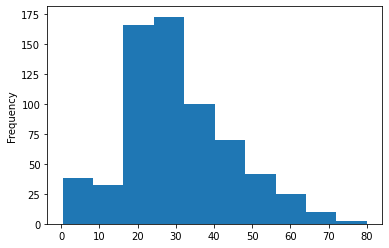

In [4]:
males = titanic_df.set_index("sex").loc["male"]
display(males.head())
males.age.plot.hist()

The more common way to filter a `DataFrame` is to use a **boolean mask**. A boolean mask is simply a `Series` of booleans whose index matches the index of the `DataFrame`.

The easiest way to create a boolean mask is to use one of the standard comparison operators `==`, `<`, `>`, and `!=` on an existing column in the `DataFrame`. For example, the following code produces a boolean mask that is equal to `True` for the male passengers and `False` otherwise.

In [5]:
titanic_df.sex == "male"

0       False
1        True
2       False
3        True
4       False
        ...  
1304    False
1305    False
1306     True
1307     True
1308     True
Name: sex, Length: 1309, dtype: bool

Notice that the equality operator `==` is not being used in the usual sense, i.e., to determine whether the object `titanic_df.sex` is the string `"male"`. This makes no sense, since `titanic_df.sex` is a `Series`. Instead, the equality operator is being _broadcast_ over the elements of `titanic_df.sex`. As a result, we end up with a `Series` of booleans that indicates whether _each_ element of `titanic_df.sex` is equal to `"male"`.

This boolean mask can then be passed into a `DataFrame` to obtain just the subset of rows where the mask equals `True`.

In [6]:
titanic_df[titanic_df.sex == "male"]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
5,1,1,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY"
7,1,0,"Andrews, Mr. Thomas Jr",male,39.0000,0,0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI"
9,1,0,"Artagaveytia, Mr. Ramon",male,71.0000,0,0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1302,3,0,"Yousif, Mr. Wazli",male,NaN,0,0,2647,7.2250,NaN,C,NaN,NaN,NaN
1303,3,0,"Yousseff, Mr. Gerious",male,NaN,0,0,2627,14.4583,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


How can we tell that it worked? For one, notice that the index is missing the numbers 0 and 2; that's because passengers 0 and 2 in the original `DataFrame` were female. Also, the index goes up to 1308, but there are only 843 rows in this `DataFrame`. 

In this new `DataFrame`, the variable `sex` should only take on one value, `"male"`. Let's check this.

In [7]:
titanic_df[titanic_df.sex == "male"]["sex"].value_counts()

male    843
Name: sex, dtype: int64

Now we can analyze this subsetted `DataFrame` using the techniques we learned in Chapter 1. For example, the following code produces a histogram of the ages of the male passengers on the Titanic:

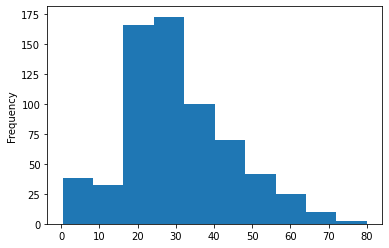

In [8]:
titanic_df[titanic_df.sex == "male"].age.plot.hist()

Boolean masks are also compatible with `.loc` and `.iloc`:

In [9]:
titanic_df.loc[titanic_df.sex == "male"]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
5,1,1,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY"
7,1,0,"Andrews, Mr. Thomas Jr",male,39.0000,0,0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI"
9,1,0,"Artagaveytia, Mr. Ramon",male,71.0000,0,0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1302,3,0,"Yousif, Mr. Wazli",male,NaN,0,0,2647,7.2250,NaN,C,NaN,NaN,NaN
1303,3,0,"Yousseff, Mr. Gerious",male,NaN,0,0,2627,14.4583,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


The ability to pass a boolean mask into `.loc` or `.iloc` is useful if we want to select columns at the same time that we are filtering rows. For example, the following code returns the ages of the male passengers:

In [10]:
titanic_df.loc[titanic_df.sex == "male", "age"]

1        0.9167
3       30.0000
5       48.0000
7       39.0000
9       71.0000
         ...   
1302        NaN
1303        NaN
1306    26.5000
1307    27.0000
1308    29.0000
Name: age, Length: 843, dtype: float64

### Speed Comparison

We've just seen two ways to filter a `DataFrame`. Which is better?

One consideration is that the first method forces you to set the index of your `DataFrame` to the variable you want to filter on. If your `DataFrame` already has a natural index, you might not want to replace that index just to be able to filter the data.

Another consideration is speed. Let's test the runtimes of the two options by using the `%timeit` magic. (**Warning:** The cell below will take a while to run, since `timeit` will run each command multiple times and report the mean and standard deviation of the runtimes.)

In [11]:
%timeit titanic_df.set_index("sex").loc["male"].age.mean()
%timeit titanic_df[titanic_df.sex == "male"].age.mean()

1.71 ms ± 10.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
904 µs ± 134 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


So boolean masking is also significantly faster than re-indexing and selecting. All things considered, boolean masking is the best way to filter your data.

## Filtering on Multiple Criteria

What if we want to visualize the age distribution of male _survivors_ on the Titanic?" To answer this question, we have to filter the `DataFrame` on two variables, `sex` and `survived`.

We can filter on two or more criteria by combining boolean masks using logical operators. First, let's get the boolean masks for the two filters of interest:

In [12]:
titanic_df.sex == "male"

0       False
1        True
2       False
3        True
4       False
        ...  
1304    False
1305    False
1306     True
1307     True
1308     True
Name: sex, Length: 1309, dtype: bool

In [13]:
titanic_df.survived == 1

0        True
1        True
2       False
3       False
4       False
        ...  
1304    False
1305    False
1306    False
1307    False
1308    False
Name: survived, Length: 1309, dtype: bool

Now, we want to combine these two boolean masks into a single mask that is `True` only when _both_ masks are `True`. This can be accomplished with the logical operator `&`.

In [14]:
(titanic_df.sex == "male") & (titanic_df.survived == 1)

0       False
1        True
2       False
3       False
4       False
        ...  
1304    False
1305    False
1306    False
1307    False
1308    False
Length: 1309, dtype: bool

Verify for yourself that the `True` values in this `Series` correspond to observations where _both_ masks were True.

**Warning**:_ Notice the parentheses around each boolean mask above. These parentheses are necessary because of operator precedence. In Python, the logical operator `&` has higher precedence than the comparison operator `==`, so the command

`titanic_df.sex == "male" & titanic_df.survived == 1`

will be interpreted as 

`titanic_df.sex == ("male" & titanic_df.survived) == 1`

and result in an error. Python does not know how to evaluate `("male" & titanic_df.survived)`, since the logical operator `&` is not defined between a `str` and a `Series`. 

The parentheses ensure that Python evaluates the boolean masks first and the logical operator second:

`(titanic_df.sex == "male") & (titanic_df.survived == 1)`.

It is very easy to forget these parentheses. Unfortunately, the error message that you get is not particularly helpful for debugging the code. If you don't believe me, just try running the offending command (without parentheses)!

Now with the boolean mask in hand, we can plot the age distribution of male survivors on the Titanic:

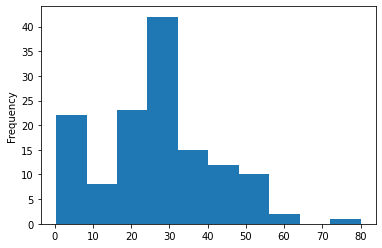

In [15]:
titanic_df[(titanic_df.sex == "male") & (titanic_df.survived == 1)].age.plot.hist()

Notice the peak between 0 and 10. A disproportionate number of young children survived because they were given priority to board the lifeboats.

Besides `&`, there are two other logical operators, `|` and `~`, that can be used to modify and combine boolean masks.

- `&` means "and"
- `|` means "or"
- `~` means "not"

Like `&`, `|` and `~` operate elementwise on boolean `Series`. Examples are provided below.

In [16]:
# male OR survived
(titanic_df.sex == "male") | (titanic_df.survived == 1)

0        True
1        True
2       False
3        True
4       False
        ...  
1304    False
1305    False
1306     True
1307     True
1308     True
Length: 1309, dtype: bool

In [17]:
# equivalent to (titanic_df.sex != "male")
~(titanic_df.sex == "male")

0        True
1       False
2        True
3       False
4        True
        ...  
1304     True
1305     True
1306    False
1307    False
1308    False
Name: sex, Length: 1309, dtype: bool

Notice how we use parentheses to ensure that the boolean mask is evaluated before the logical operators.

## Grouping data

In the previous section, we discussed how to restrict our analysis to a particular subset of observations using boolean masks. 

But what if we wanted to calculate the survival rate by class? We could slice the data set three times, once for each class:

In [18]:
(titanic_df[titanic_df.pclass == 1]['survived'].mean(), 
 titanic_df[titanic_df.pclass == 2]['survived'].mean(), 
 titanic_df[titanic_df.pclass == 3]['survived'].mean())

(0.6191950464396285, 0.4296028880866426, 0.2552891396332863)

But this code is inefficient and repetitive. It also does not generalize well to variables with hundreds of possible categories. 

The problem of calculating the survival rate by class is an example of a problem that can be solved using the **split-apply-combine strategy**. The key insight here is that many data analyses follow the same basic pattern:

- First, a data set is **split** into several subsets based on some variable.
- Next, some analysis is **applied** to each subset.
- Finally, the results from each analysis are **combined**.

The three steps are diagrammed in the figure below:

![](https://github.com/nmattei/cmps3160/raw/master/_labs/images/split_apply_combine.png)  [source](https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/03.08-Aggregation-and-Grouping.ipynb)

Applying this strategy to our working example above, we should first _split_ up the Titanic data according to the value of `pclass`, _apply_ `.survived.mean()` to each subset, and finally _combine_ the results into one `Series`.

[_Note:_ The term "split-apply-combine" was coined by Hadley Wickham in [a 2011 paper](https://www.jstatsoft.org/article/view/v040i01), but the idea is not new. It should already be familiar to you if you know SQL or MapReduce.]

## Split-Apply-Combine in `pandas`: the `.groupby()` method

To implement the split-apply-combine strategy in `pandas`, we use the `.groupby()` method. First, we specify one or more variables to split on in the argument to `.groupby()`. Then, we specify our analysis as usual. Pandas will handle splitting the data, applying the analysis to each subset, and combining the results at the end.

In [19]:
titanic_df.groupby("pclass").survived.mean()

pclass
1    0.619195
2    0.429603
3    0.255289
Name: survived, dtype: float64

Compare this line of code with the code to calculate the overall survival rate:

`titanic_df.survived.mean()`.

The only difference is `.groupby("pclass")`. This turns a `DataFrame` into a `DataFrameGroupBy` object, which behaves like a `DataFrame`, except that any analysis that we specify will be applied to subsets of the `DataFrame` instead of the whole `DataFrame`.

You can even make visualizations with `.groupby()`! To plot the age distribution of the survivors and non-survivors, we can group by the `survived` variable and then ask for a histogram of `age`. Behind the scenes, `pandas` will do this once for the survivors and again for the non-survivors and then combine them into one histogram.

survived
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: age, dtype: object

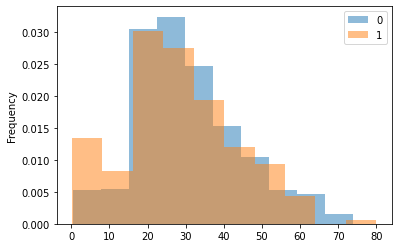

In [20]:
titanic_df.groupby("survived").age.plot.hist(alpha=.5, density=True, legend=True)

It is also possible to group by more than one variable. Simply pass in a list of variable names to `.groupby()`. For example, the following code calculates the survival rate by class and sex:

In [21]:
survival_rates = titanic_df.groupby(["pclass", "sex"])["survived"].mean()
survival_rates

pclass  sex   
1       female    0.965278
        male      0.340782
2       female    0.886792
        male      0.146199
3       female    0.490741
        male      0.152130
Name: survived, dtype: float64

It's clear that survival rates on the Titanic varied drastically by class and by sex.

Notice that when we use `.groupby()`, the resulting index is whatever variable(s) we grouped by. Since we grouped by two variables, this index actually has two levels. An index with more than one level is called a `MultiIndex` in `pandas`. To access a particular row in a `DataFrame` that is indexed by a `MultiIndex`, we pass in a tuple of the values we want from each level.

So, for example, to get female passengers in 2nd class, we would do:

In [22]:
survival_rates.loc[(2, "female")]

0.8867924528301887

If we pass in fewer values than there are levels in the index, `pandas` will return everything from the remaining levels.

In [23]:
survival_rates.loc[2]

sex
female    0.886792
male      0.146199
Name: survived, dtype: float64

In [24]:
survival_rates.loc[:, 'female']

pclass
1    0.965278
2    0.886792
3    0.490741
Name: survived, dtype: float64

Note that some times the above won't work depending on how the indicies are setup.  It may be eaiser to use the [.xs method sometimes](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.xs.html).

In [25]:
survival_rates.xs('female', level=1)

pclass
1    0.965278
2    0.886792
3    0.490741
Name: survived, dtype: float64

## Pivot Tables and The Data Cube

In [26]:
titanic_df["adult"] = (titanic_df["age"] >= 18)

Previously, we learned to split a `pandas` `DataFrame` and apply the same analysis to each of the resulting, smaller `DataFrame`s. For example, the following code calculates the proportion of Titanic passengers of each sex, age group, and class who survived:

In [27]:
survivors_table = (titanic_df.
                   groupby(["sex", "adult", "pclass"]).
                   survived.
                   mean())
survivors_table.to_frame()

survived
sex    adult pclass          
female False 1       0.947368
             2       0.952381
             3       0.536364
       True  1       0.968000
             2       0.870588
             3       0.443396
male   False 1       0.400000
             2       0.464286
             3       0.147059
       True  1       0.326389
             2       0.083916
             3       0.155709

Here's another way to think about these results: there are three dimensions, `sex`, `adult`, and `pclass`, and we calculate a metric, the proportion of survivors, for each of the $2 \times 2 \times 3 = 12$ possible combinations of the dimension values.

There are many equivalent ways to represent these results. The representation above is essentially the _tabular form_ that we learned in Chapter 1. Each row represents an observation (i.e., a distinct combination of sex, adult, and class) and each column a variable (i.e., the proportion of passengers who survived). Another way to represent these results is using a **data cube**. In a data cube, the possible values of each dimension are laid out along one dimension of a cube, as shown below:

![](https://github.com/nmattei/cmps3160/blob/master/_labs/images/datacube.png?raw=1)

The term "data _cube_" is somewhat of a misnomer, since it does not have to be a cube. First, as we can plainly see in the figure above, the dimensions need not all be the same size; some dimensions may have more values than others. Second, a data cube can have any number of dimensions, so it does not have to be three-dimensional. A data cube with $d$ dimensions is really a $d$-dimensional hypercube. A 2-dimensional hypercube is a square (or rectangle), a 1-dimensional hypercube is a line, and a 0-dimensional hypercube is a point.

While it is useful to imagine a data cube as a $d$-dimensional hypercube, it is not practical to display data in a hypercube---at least not when $d > 2$. So a data cube is often printed as a two-dimensional table, with multi-level row indexes and columns to represent the dimensions. This two-dimensional representation of the data cube is called a **pivot table**. Here is the code to produce a pivot table from the raw data:

In [28]:
survivors_cube = titanic_df.pivot_table(
    index="sex", columns=["adult", "pclass"],
    values="survived", aggfunc=np.mean)
survivors_cube

adult      False                          True                    
pclass         1         2         3         1         2         3
sex                                                               
female  0.947368  0.952381  0.536364  0.968000  0.870588  0.443396
male    0.400000  0.464286  0.147059  0.326389  0.083916  0.155709

To create a pivot table, we had to specify 
- the row index(es): Here, we chose to include two of the dimensions (`adult`, `sex`) along the rows of the pivot table.
- the column(s): Here, we chose to include the one remaining dimension (`pclass`) in the columns.
- the metric in the cells of the table: Here, we chose to report the _mean_ of the `survived` column in each cell.

The resulting pivot table is just stored in an ordinary `DataFrame`; `pandas` does not have a special data structure for pivot tables.

Notice how we explicitly specified an aggregation function `aggfunc`. That's because in the original `DataFrame` (`titanic_df`), there were many passengers with the same values for all three dimensions, so each cell of this pivot table actually represents many passengers. In order to summarize all of these passengers by a single value, we have to aggregate the values. The mean is not the only aggregation function we could have used; we could have also calculated the sum, to obtain the _number_ of survivors.

In [29]:
titanic_df.pivot_table(
    index="sex", columns=["adult", "pclass"],
    values="survived", aggfunc=np.sum
)

adult  False         True        
pclass     1   2   3    1   2   3
sex                              
female    18  20  59  121  74  47
male      14  13  30   47  12  45

If the data is in data cube form (i.e., in a pivot table), it can be converted to tabular form by simply stacking the columns, one on top of the other. In `pandas`, this can be done using the `.stack()` function:

In [30]:
survivors_cube.stack(["adult", "pclass"])

sex     adult  pclass
female  False  1         0.947368
               2         0.952381
               3         0.536364
        True   1         0.968000
               2         0.870588
               3         0.443396
male    False  1         0.400000
               2         0.464286
               3         0.147059
        True   1         0.326389
               2         0.083916
               3         0.155709
dtype: float64

Compare the above result with `survivors_table`.

Likewise, we can convert a `pandas` object in tabular form to data cube form by _unstacking_ the index, assuming that all of the dimensions are already in the index.

In [31]:
survivors_cube = survivors_table.unstack(["adult", "pclass"])
survivors_cube

adult      False                          True                    
pclass         1         2         3         1         2         3
sex                                                               
female  0.947368  0.952381  0.536364  0.968000  0.870588  0.443396
male    0.400000  0.464286  0.147059  0.326389  0.083916  0.155709

Stacking tends to produce longer objects with more rows, while unstacking tends to produce wider objects with more columns. For this reason, tabular form is sometimes referred to as "long form", in contrast to the data cube, which is "wide form."

# Some Features of Data Cubes

It is much easier to quickly compare numbers in data cube form than in tabular form. For example, it is apparent from the preceding pivot table that males had much lower survival rates than females just by comparing the numbers across each row; this fact is more difficult to discern from `survivors_table`.

It is also more efficient to store data in a data cube. Recall that `survivors_table` and `survivors_cube` contain the exact same information. However, the data cube is 70% smaller than the tabular version of the same data:

In [32]:
survivors_table.__sizeof__(), survivors_cube.__sizeof__()

(617, 220)

In many implementations of the data cube, it is also faster to access values in a data cube than in a table. Unfortunately, because `pandas` represents data cubes as two-dimensional pivot tables, it does not enjoy these advantages.

In [33]:
survivors_table.loc["female", True, 1]

0.968

In [34]:
survivors_cube.loc["female", (True, 1)]

0.968

Data cubes also play nicely with bar charts in `pandas`. When `.plot.bar()` is called on a `pandas` `DataFrame`, one set of bars will be created for each column. So when we call `.plot.bar()` on a pivot table, we will get one set of bars for females and another set of bars for males.

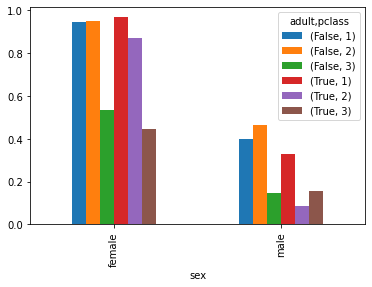

In [35]:
survivors_cube.plot.bar()

Notice that the $x$-axis of the bar graph contains all of the dimensions in the row index. So to get `pclass` on the $x$-axis, we have to create a pivot table where `pclass` is the row index:

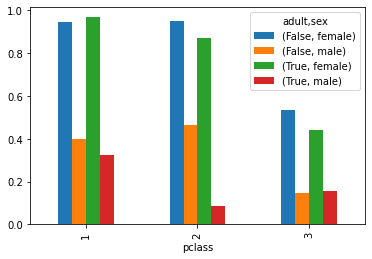

In [36]:
titanic_df.pivot_table(
    index="pclass", columns=["adult", "sex"],
    values="survived", aggfunc=np.mean
).plot.bar()

Finally, many analytical operations are easier to do when the data is in data cube format.

# Exercises

The following exercises deal with the Tips data set (`../data/tips.csv`).

In [37]:
tips_df = pd.read_csv("../data/tips.csv")
tips_df["tip_percent"] = tips_df.tip / tips_df.total_bill
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size,tip_percent
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808


**Exercise 1.** Calculate the average tip percentage paid by parties of 4 or more.

In [38]:
# YOUR CODE HERE
tips_df.loc[tips_df['size']>=4,'tip_percent'].mean()

0.14635885842822238

**Exercise 2.** Make a visualization comparing the distribution of tip percentages left by males and females. How do they compare?

sex
Female    AxesSubplot(0.125,0.125;0.775x0.755)
Male      AxesSubplot(0.125,0.125;0.775x0.755)
Name: tip_percent, dtype: object

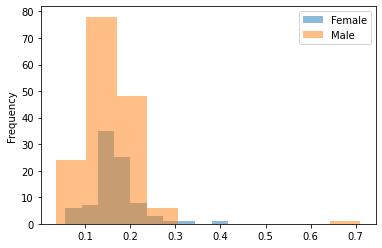

In [39]:
# YOUR CODE HERE
tips_df.groupby('sex').tip_percent.plot.hist(alpha =.5, density= False, legend= True)

**Exercise 3.** On which day of the week does the waiter serve the largest parties, on average? (You did this exercise in the previous section. See how much easier it is to do using `.groupby()`.)

In [40]:
# YOUR CODE HERE

size_byday = tips_df.groupby(["day"])["size"].mean()
size_byday 

# Sunday is the day that the waiter serve the largest parties on average 

day
Fri     2.105263
Sat     2.517241
Sun     2.842105
Thur    2.451613
Name: size, dtype: float64

**Exercise 4.** Calculate the average bill by day and time. What day-time combination has the highest average bill?

In [41]:
# YOUR CODE HERE
bill_byday = tips_df.groupby(["day",'time'])["total_bill"].mean()
bill_byday

# The combination of Sunday and dinner has the highest average bill

day   time  
Fri   Dinner    19.663333
      Lunch     12.845714
Sat   Dinner    20.441379
Sun   Dinner    21.410000
Thur  Dinner    18.780000
      Lunch     17.664754
Name: total_bill, dtype: float64

**Answer Here:**

**Exercise 5.** Extract the average bill for Friday lunch from the result of Exercise 2.

In [42]:
# YOUR CODE HERE
bill_byday.loc[('Fri', "Lunch")]

12.845714285714285

**Exercise 6.** Use `.groupby()` to make a visualization comparing the distribution of tip percentages left by males and females. How do they compare?

sex
Female    AxesSubplot(0.125,0.125;0.775x0.755)
Male      AxesSubplot(0.125,0.125;0.775x0.755)
Name: tip_percent, dtype: object

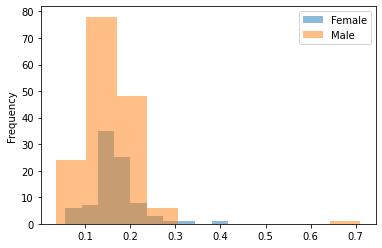

In [46]:
# YOUR CODE HERE
tips_df.groupby('sex').tip_percent.plot.hist(alpha =.5, density= False, legend= True)

**Exercise 7.** Calculate the average total bill by day, time, and table size. Display the results in a pivot table.

In [55]:
# TYPE YOUR CODE HERE.
# tips_table = (tips_df.groupby(["day", "time",'size']).total_bill.mean())
# tips_table.to_frame()

tips_cube = tips_df.pivot_table( index="day", columns=["time", "size"],
    values="total_bill", aggfunc=np.mean)
tips_cube


time Dinner                                                 Lunch             \
size      1          2          3          4      5      6      1          2   
day                                                                            
Fri     NaN  17.799091        NaN  40.170000    NaN    NaN   8.58  13.072000   
Sat    5.16  16.837170  25.509444  29.876154  28.15    NaN    NaN        NaN   
Sun     NaN  17.560000  22.184000  26.688333  27.00  48.17    NaN        NaN   
Thur    NaN  18.780000        NaN        NaN    NaN    NaN  10.07  15.079787   

time                                  
size      3      4      5          6  
day                                   
Fri   15.98    NaN    NaN        NaN  
Sat     NaN    NaN    NaN        NaN  
Sun     NaN    NaN    NaN        NaN  
Thur  19.16  29.95  41.19  30.383333

**Exercise 8.** Make a bar chart showing the average total bill by table size, day, and time. (You will have to decide which variable(s) to represent on the $x$-axis and which variable(s) to represent using different colored bars.)  Explain your choice below.

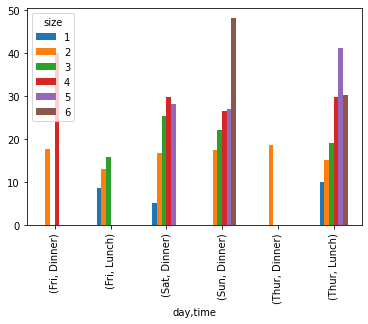

In [59]:
# TYPE YOUR CODE HERE.
tips_df.pivot_table(
    index=["day","time"], columns=["size"],
    values="total_bill", aggfunc=np.mean).plot.bar()

# I decide to use day and time to represnet on the x-axis and use party size to represnet using different colors. I tested out multiple options 
# and I believe this is the best way to show all the information. 

**Answer Here:**

**TYPE YOUR EXPLANATION HERE.**

### When you have filled out all the questions, submit via [Tulane Canvas](https://tulane.instructure.com/)